<a href="https://colab.research.google.com/github/yawoffeh/Student-Flexibility-in-Online-Learning/blob/main/Student_Flexibility_in_Online_Learning_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive

In [33]:
drive.mount("MyDrive")

Drive already mounted at MyDrive; to attempt to forcibly remount, call drive.mount("MyDrive", force_remount=True).


In [34]:
import pandas as pd
import numpy as np

In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [79]:
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
path = "/content/MyDrive/MyDrive/dataset/students_adaptability_level_online_education.csv"

In [37]:
data = pd.read_csv(path)

In [38]:
data.head()


,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G,Moderate
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G,Moderate
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G,Low


In [39]:
data.shape

(1205, 11)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education Level      1205 non-null   object
 1   Institution Type     1205 non-null   object
 2   Gender               1205 non-null   object
 3   Age                  1205 non-null   int64 
 4   Device               1205 non-null   object
 5   IT Student           1205 non-null   object
 6   Location             1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Flexibility Level    1205 non-null   object
dtypes: int64(1), object(10)
memory usage: 103.7+ KB


In [41]:
data.describe()

,Age
count,1205.000000
mean,17.065560
std,5.830369
min,9.000000
25%,11.000000
50%,18.000000
75%,23.000000
max,27.000000


In [42]:
data.isnull().sum().to_frame()

,0
Education Level,0
Institution Type,0
Gender,0
Age,0
Device,0
IT Student,0
Location,0
Financial Condition,0
Internet Type,0
Network Type,0


In [43]:
target = data.copy()['Flexibility Level']
X = data.copy().drop(["Flexibility Level"], axis=1)

In [44]:
target.unique()

array(['Moderate', 'Low', 'High'], dtype=object)

In [45]:
target.value_counts().to_frame()

,count
Flexibility Level,
Moderate,625
Low,480
High,100


### Data Visualization

<ipython-input-50-c1e347774969>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'Flexibility Level', data=data, palette='viridis')


<Axes: xlabel='Flexibility Level', ylabel='count'>

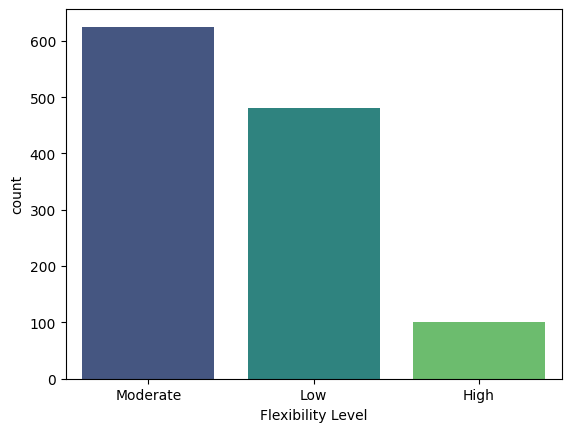

In [50]:
sns.countplot(x= 'Flexibility Level', data=data, palette='viridis')

<ipython-input-51-e6e4864575f4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Flexibility Level', y="Age", data=data, palette="viridis")


<Axes: xlabel='Flexibility Level', ylabel='Age'>

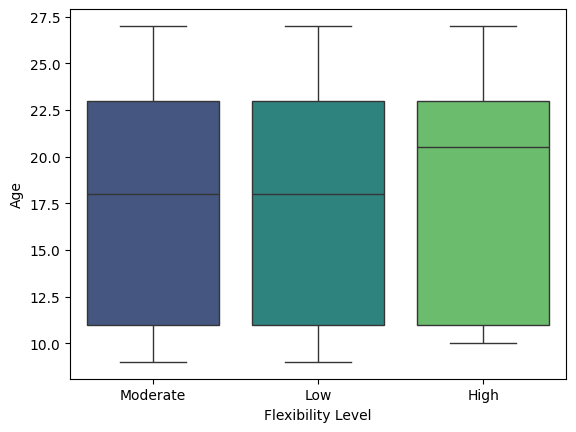

In [51]:
sns.boxplot(x='Flexibility Level', y="Age", data=data, palette="viridis")

## Data Preprocessing

In [46]:
categorical_cols = X.select_dtypes(include=object)

In [47]:
categorical_cols.head()

,Education Level,Institution Type,Gender,Device,IT Student,Location,Financial Condition,Internet Type,Network Type
0,University,Private,Male,Tab,No,Town,Mid,Wifi,4G
1,University,Private,Female,Mobile,No,Town,Mid,Mobile Data,4G
2,College,Public,Female,Mobile,No,Town,Mid,Wifi,4G
3,School,Private,Female,Mobile,No,Town,Mid,Mobile Data,4G
4,School,Private,Female,Mobile,No,Town,Poor,Mobile Data,3G


### Encoding target values

In [48]:
label_encoder = LabelEncoder()

encoded_values = label_encoder.fit_transform(target)

y = encoded_values

### Encode categorical features

In [54]:
encoded_vals = pd.get_dummies(categorical_cols, columns=categorical_cols.columns, drop_first=True, dtype=int)

In [56]:
encoded_vals.head()

,Education Level_School,Education Level_University,Institution Type_Public,Gender_Male,Device_Mobile,Device_Tab,IT Student_Yes,Location_Town,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Wifi,Network Type_3G,Network Type_4G
0,0,1,0,1,0,1,0,1,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,1
2,0,0,1,0,1,0,0,1,0,0,1,0,1
3,1,0,0,0,1,0,0,1,0,0,0,0,1
4,1,0,0,0,1,0,0,1,1,0,0,1,0


In [57]:
X.head()

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G


In [61]:
X.drop(categorical_cols.columns, inplace=True, axis=1)

In [62]:
X.head()

,Age
0,23
1,23
2,18
3,11
4,18


In [63]:
X[encoded_vals.columns] = encoded_vals

In [64]:
X.head()

,Age,Education Level_School,Education Level_University,Institution Type_Public,Gender_Male,Device_Mobile,Device_Tab,IT Student_Yes,Location_Town,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Wifi,Network Type_3G,Network Type_4G
0,23,0,1,0,1,0,1,0,1,0,0,1,0,1
1,23,0,1,0,0,1,0,0,1,0,0,0,0,1
2,18,0,0,1,0,1,0,0,1,0,0,1,0,1
3,11,1,0,0,0,1,0,0,1,0,0,0,0,1
4,18,1,0,0,0,1,0,0,1,1,0,0,1,0


In [67]:
X.shape

(1205, 14)

## Modelling

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
model = LGBMClassifier(random_state=42, n_estimators=543, learning_rate=0.1, n_jobs=9)

In [81]:
model.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33
[LightGBM] [Info] Number of data points in the train set: 843, number of used features: 14
[LightGBM] [Info] Start training from score -2.626093
[LightGBM] [Info] Start training from score -0.950070
[LightGBM] [Info] Start training from score -0.614474
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

LGBMClassifier(n_estimators=543, n_jobs=9, random_state=42)

In [82]:
y_pred = model.predict(X_test)

In [83]:
accuracy = accuracy_score(y_test, y_pred)

In [84]:
accuracy

0.7955801104972375